In [15]:
# Exploración de los datos del proyecto - JSON COCO format
import json
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

def get_data_report(base_path, split_suffix, color_bars="orange"):
    splits = ["train", "val", "test"]

    # Diccionario para guardar información
    data_summary = {}

    for split in splits:
        file_path = f"{base_path}/{split}_{split_suffix}_A_B_E_K_WH_WB.json"
        
        with open(file_path, "r") as f:
            data = json.load(f)

        # Conteo de imágenes y anotaciones
        num_images = len(data["images"])
        num_annotations = len(data["annotations"])
        
        # Extraer clases
        category_map = {cat["id"]: cat["name"] for cat in data["categories"]}
        
        # Conteo por especie
        class_counts = Counter([ann["category_id"] for ann in data["annotations"]])
        class_counts_named = {category_map[k]: v for k, v in class_counts.items()}
        
        # Tamaños de imágenes (únicos)
        # sizes = {(img["width"], img["height"]) for img in data["images"]}
        sizes = {f"{img["width"]}x{img["height"]}" for img in data["images"]}
        
        data_summary[split] = {
            "num_images": num_images,
            "num_annotations": num_annotations,
            "class_distribution": class_counts_named,
            "image_sizes": list(sizes),
        }

    # Mostrar resumen general
    for split in splits:
        print(f"\n=== {split.upper()} ===")
        print(f"Número de imágenes: {data_summary[split]['num_images']}")
        print(f"Número de anotaciones: {data_summary[split]['num_annotations']}")
        print("Distribución de clases:")
        for especie, count in data_summary[split]["class_distribution"].items():
            print(f"  {especie}: {count}")
        print("Tamaños únicos de imagen:")
        for size in data_summary[split]["image_sizes"]:
            print(f"  {size}")

    # Gráfico de distribución por especie (total)
    total_counts = Counter()
    for split in splits:
        total_counts.update(data_summary[split]["class_distribution"])

    plt.figure(figsize=(10, 5))
    plt.bar(total_counts.keys(), total_counts.values())
    bars = plt.bar(total_counts.keys(), total_counts.values(), color=color_bars)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
                ha='center', va='bottom', fontsize=9)
    plt.title("Distribución total por especie")
    plt.ylabel("Número de anotaciones")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


=== TRAIN ===
Número de imágenes: 928
Número de anotaciones: 6962
Distribución de clases:
  Kob: 1732
  Buffalo: 1058
  Warthog: 316
  Waterbuck: 166
  Alcelaphinae: 1678
  Elephant: 2012
Tamaños únicos de imagen:
  5496x3670
  5525x3690
  6000x4000
  5472x3648
  5521x3687

=== VAL ===
Número de imágenes: 111
Número de anotaciones: 978
Distribución de clases:
  Warthog: 43
  Buffalo: 102
  Alcelaphinae: 369
  Kob: 161
  Waterbuck: 39
  Elephant: 264
Tamaños únicos de imagen:
  5496x3670
  5525x3690
  6000x4000
  5472x3648
  5521x3687

=== TEST ===
Número de imágenes: 258
Número de anotaciones: 2299
Distribución de clases:
  Kob: 477
  Buffalo: 349
  Warthog: 74
  Alcelaphinae: 675
  Waterbuck: 36
  Elephant: 688
Tamaños únicos de imagen:
  5472x3648
  5496x3670
  6000x4000
  5525x3690


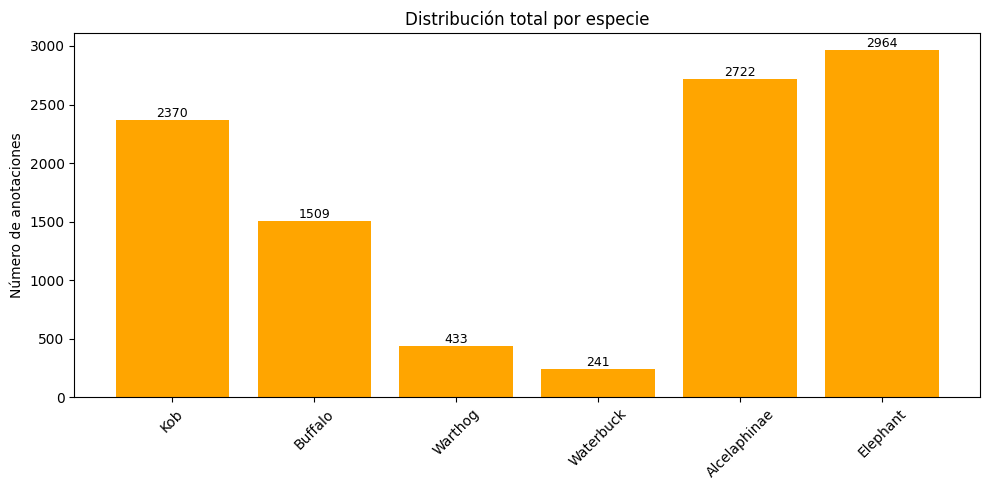

In [16]:
get_data_report("../data/groundtruth/json/big_size", "big_size")


=== TRAIN ===
Número de imágenes: 1724
Número de anotaciones: 7461
Distribución de clases:
  Kob: 1745
  Buffalo: 1080
  Warthog: 323
  Waterbuck: 169
  Alcelaphinae: 1701
  Elephant: 2443
Tamaños únicos de imagen:
  2000x2000

=== VAL ===
Número de imágenes: 666
Número de anotaciones: 994
Distribución de clases:
  Warthog: 44
  Buffalo: 104
  Alcelaphinae: 376
  Kob: 163
  Waterbuck: 40
  Elephant: 267
Tamaños únicos de imagen:
  1525x1690
  2000x1687
  2000x1670
  1521x1687
  1496x1670
  1525x2000
  2000x2000
  1472x2000
  1472x1648
  2000x1690
  2000x1648
  1496x2000
  1521x2000

=== TEST ===
Número de imágenes: 1548
Número de anotaciones: 2326
Distribución de clases:
  Kob: 482
  Buffalo: 356
  Warthog: 75
  Alcelaphinae: 681
  Waterbuck: 36
  Elephant: 696
Tamaños únicos de imagen:
  1525x1690
  2000x1670
  1496x1670
  1525x2000
  2000x2000
  1472x2000
  1472x1648
  2000x1690
  2000x1648
  1496x2000


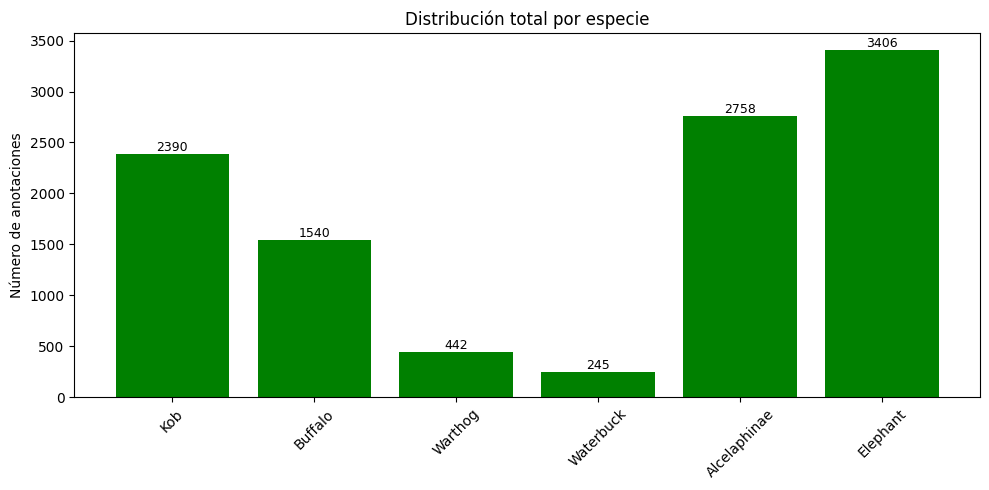

In [17]:
get_data_report("../data/groundtruth/json/sub_frames", "subframes", "green")